In [30]:
import os
import sys
sys.path.append(os.path.abspath("/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/Python_scripts/simulator"))
from simulate import Simulator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# col= 1083
# row = 184
# year = 2015
# emergence = simulator.emergence(col, row, year, False)

ppt_path = '/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/ppt_prism_new_york_data.csv'
tmean_path = '/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/tmean_prism_new_york_data.csv'
forage_path = '/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/R_scripts/output/ny_spring_floral_resource_quality_4km_by_4km.csv'

In [3]:
simulator = Simulator(ppt_path=ppt_path, tmean_path=tmean_path, forage_path=forage_path, vectorize=False)

In [4]:
from datetime import datetime
def getEmergenceData(col, row, year):
    # try:
    #   return getEmergence_vector(col, row, year)
    # except:
    #     print(col, row, year)
    #     return getEmergence(col, row, year)

    # return a timestamp for 7th May 2015
    return datetime.fromtimestamp(1430985600)

In [5]:
grids = simulator.tmean[["Site", "col","row","grid_id"]]
grids

,Site,col,row,grid_id
0,AB,1152,169,1152_169
1,BA,1164,175,1164_175
2,BD,1160,177,1160_177
3,EV,1162,185,1162_185
4,GR,1165,174,1165_174
5,HG,1164,181,1164_181
6,HS,1151,169,1151_169
7,IC,1163,179,1163_179
8,IT,1165,179,1165_179
9,KI,1160,177,1160_177


In [6]:
# get emergence data for 2015
year = 2015
grids[f"emergence_{year}"] = grids.apply(lambda x: getEmergenceData(x["col"], x["row"], year), axis=1)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_99953/3282249813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids[f"emergence_{year}"] = grids.apply(lambda x: getEmergenceData(x["col"], x["row"], year), axis=1)


In [7]:
# get egg production data for 2015
grids[f"egg_production_{year}"] = grids.apply(lambda x: simulator.eggProduction(x["col"], x["row"], x[f"emergence_{year}"], vectorize=False), axis=1)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_99953/794007852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids[f"egg_production_{year}"] = grids.apply(lambda x: simulator.eggProduction(x["col"], x["row"], x[f"emergence_{year}"], vectorize=False), axis=1)


In [8]:
grids['eggs']=[item['eggs'] for item in grids['egg_production_2015'].tolist()]

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_99953/3927567471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids['eggs']=[item['eggs'] for item in grids['egg_production_2015'].tolist()]


In [9]:
grids['forage_quality'] = [item['forage_quality'] for item in grids['egg_production_2015'].tolist()]

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_99953/1819492138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids['forage_quality'] = [item['forage_quality'] for item in grids['egg_production_2015'].tolist()]


In [10]:
import pandas as pd
exp = pd.read_csv('/Users/edwardamoah/Documents/GitHub/osmiaBeePop/research/data/Centrella_et_al_Data.csv')

In [11]:
exp['Calendar_Date'] = pd.to_datetime(exp['Calendar_Date'])
exp['Emergence'] = '5/7/2015' # 7th May 2015
exp['Emergence'] = pd.to_datetime(exp['Emergence'])
exp['Final_Date'] = '6/24/2015' # 24th June 2015
exp['Final_Date'] = pd.to_datetime(exp['Final_Date'])

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_99953/2969717530.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exp['Calendar_Date'] = pd.to_datetime(exp['Calendar_Date'])


In [12]:
# get data collection dates
exp['collection_dates'] = exp['Site_Code'].apply(lambda x: exp[exp['Site_Code'] == x]['Calendar_Date'].tolist())

In [13]:
from datetime import timedelta
def getForagingDates(calendar_date, emergence, collection_dates):
    
    # find the most recent date just before the calendar date
    early_date = None
    collection_dates = [x for x in collection_dates if x < calendar_date]
    #print(collection_dates)
    if len(collection_dates) > 0:
        early_date = max(collection_dates) + timedelta(days=1)
    else:
        early_date = emergence + timedelta(days=1)

    #print(early_date, calendar_date)

    # generate a list of dates between early date and calendar date
    foraging_dates = [early_date + timedelta(days=x) for x in range((calendar_date - early_date).days + 1)]

    return foraging_dates
    


In [14]:
exp['foraging_dates'] = exp.apply(lambda x: getForagingDates(x['Calendar_Date'], x['Emergence'], x['collection_dates']), axis=1)

In [15]:
#exp[['Site_Code', 'Calendar_Date', 'Emergence', 'Final_Date', 'collection_dates', 'foraging_dates']].to_dict(orient='records')

In [16]:
grids['Site_Code'] = grids['Site']
grids['egg_days'] = [x['egg_days'] for x in grids['egg_production_2015']]
grids['forage_quality'] = [x['forage_quality'] for x in grids['egg_production_2015']]

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_99953/1879244261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids['Site_Code'] = grids['Site']
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_99953/1879244261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids['egg_days'] = [x['egg_days'] for x in grids['egg_production_2015']]
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_99953/1879244261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [17]:
dt = grids[['Site_Code', 'col', 'row','forage_quality', 'egg_days']].merge(exp[['foraging_dates', 'Site_Code', 'Proportion_Larval_Mortality', 'Proportion_Female_Offspring', 'Total_Emerged_Males','Total_Emerged_Females','Nest_Tubes for_Offspring_Analysis', 'Nest_Tubes_for_Pollen_Analysis','Total_Pollen_Provisions_Analyzed', 'Temp_C', 'Time_Point']], on='Site_Code')

In [18]:
dt['eggs_produced'] = (dt['Total_Emerged_Males'] + dt['Total_Emerged_Females'] + dt['Total_Pollen_Provisions_Analyzed'])/1 - dt['Proportion_Larval_Mortality']

In [19]:
dt['eggs_per_nest'] = dt['eggs_produced']/(dt['Nest_Tubes for_Offspring_Analysis'] + dt['Nest_Tubes_for_Pollen_Analysis'])
dt['female_eggs_per_nest'] = dt['eggs_per_nest']* dt['Proportion_Female_Offspring']

In [20]:
def getTmeans(col, row, foraging_dates):
    tmeans = []
    for date in foraging_dates:
        tmeans.append(simulator.getTmean(col, row, date.day, date.month, date.year))
    return tmeans

def getPpts(col, row, foraging_dates):
    ppts = []
    for date in foraging_dates:
        ppts.append(simulator.getPpt(col, row, date.day, date.month, date.year))
    return ppts

In [21]:
dt['tmeans'] = dt.apply(lambda x: getTmeans(x['col'], x['row'], x['foraging_dates']), axis=1)
dt['ppts'] = dt.apply(lambda x: getPpts(x['col'], x['row'], x['foraging_dates']), axis=1)

In [22]:
import numpy as np
dt['tmean'] = dt['tmeans'].apply(lambda x: np.mean(x))
dt['ppt'] = dt['ppts'].apply(lambda x: np.mean(x))

In [23]:
def getPredictedEggs(tmean, ppt, forage_quality, forage_threshold=0.5, temp_threshold=13.9, ppt_threshold=5.0):
    eggs = 0
    egg_delta = 1
    if forage_quality < forage_threshold:
        egg_delta = 1
    else:
        egg_delta = 2
    for day in range(len(tmean)):
        tm = tmean[day]
        pt = ppt[day]
        if tm >= temp_threshold and pt < ppt_threshold:
            eggs += egg_delta

    return eggs

In [24]:
# Forage_Threshold     0.510254
# Temp_Threshold      17.294922
# Precip_Threshold     1.225586
# R2                   0.999822

# Forage_Threshold     0.540137
# Temp_Threshold      18.724609
# Precip_Threshold     4.331055
# R2                   0.602118


In [25]:
dt['predicted_eggs'] = dt.apply(lambda x: getPredictedEggs(x['tmeans'], x['ppts'], x['forage_quality']), axis=1)
dt['predicted_eggs_opt'] = dt.apply(lambda x: getPredictedEggs(x['tmeans'], x['ppts'], x['forage_quality'], 0.540137,18.724609, 4.331055), axis=1)

In [26]:
#dt['predicted_eggs'] = dt.apply(lambda x: getPredictedEggs(x['tmeans'], x['ppts'], x['forage_quality'],0.54, 19.84,  0.20 ), axis=1)

In [27]:
#dt['predicted_eggs_cum'] = dt.apply(lambda x: getPredictedEggsCum(x['tmeans'], x['ppts'], x['forage_quality']), axis=1)

In [28]:
np.corrcoef(dt['eggs_produced'], dt['predicted_eggs'])

array([[1.        , 0.41346179],
       [0.41346179, 1.        ]])

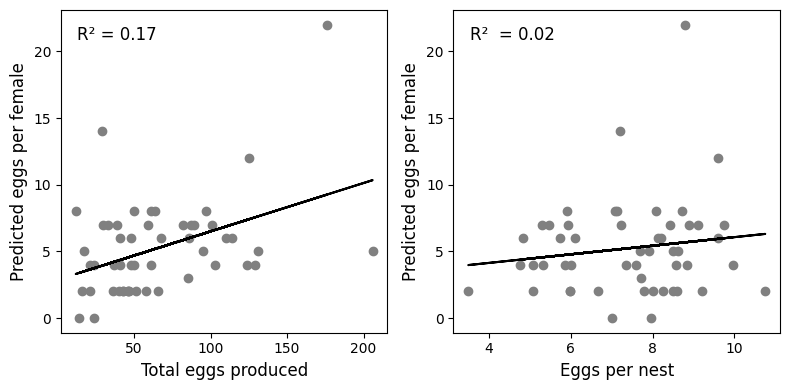

In [31]:
from sklearn.linear_model import LinearRegression


#fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, figsize=(10, 10))
fig, (ax1, ax4) = plt.subplots(1, 2, figsize=(8, 4))
#ax1, ax2 = axes[0]
#ax3, ax4 = axes[1]


font_size = 12

# Scatter plot of actual eggs vs predicted eggs
y = dt['predicted_eggs'].values.reshape(-1, 1)
X = dt['eggs_produced'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
r2 = round(reg.score(X, y), 2)
ax1.scatter(dt['eggs_produced'], dt['predicted_eggs'], color='gray')
ax1.plot(X, reg.predict(X), color='black')
ax1.set_xlabel('Total eggs produced', fontsize=font_size)
ax1.set_ylabel('Predicted eggs per female', fontsize=font_size)
ax1.text(0.05, 0.95, f'R² = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, fontsize=font_size)
#ax1.text(0.05, 0.95, f'R² = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, fontsize=font_size)

# # Scatter plot of actual eggs vs cumulative predicted eggs
# y = dt['predicted_eggs_cum'].values.reshape(-1, 1)
# X = dt['eggs_produced'].values.reshape(-1, 1)
# reg = LinearRegression().fit(X, y)
# r2 = round(reg.score(X, y), 2)
# ax2.scatter(dt['eggs_produced'], dt['predicted_eggs_cum'], color='gray')
# ax2.plot(X, reg.predict(X), color='black')
# ax2.set_xlabel('Total Eggs Produced', fontsize=font_size)
# ax2.set_ylabel('Cumulative degree days above 13.9 ℃', fontsize=font_size)
# ax2.text(0.05, 0.95, f'R²  = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax2.transAxes, fontsize=font_size)
# #ax2.text(0.05, 0.95, f'R²  = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax2.transAxes, fontsize=font_size)



# #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# font_size = 12

# # Scatter plot of actual eggs vs predicted eggs
# y = dt['predicted_eggs'].values.reshape(-1, 1)
# X = dt['eggs_per_nest'].values.reshape(-1, 1)
# reg = LinearRegression().fit(X, y)
# r2 = round(reg.score(X, y), 2)
# ax3.scatter(dt['eggs_per_nest'], dt['predicted_eggs'], color='gray')
# ax3.plot(X, reg.predict(X), color='black')
# ax3.set_xlabel('Eggs per nest', fontsize=font_size)
# ax3.set_ylabel('Predicted eggs per female', fontsize=font_size)
# #ax3.text(0.05, 0.95, f'R² = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, fontsize=font_size)
# #ax3.text(0.05, 0.95, f'R² = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, fontsize=font_size)
# ax3.text(0.05, 0.95, f'R² = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax3.transAxes, fontsize=font_size)

# Scatter plot of actual eggs vs cumulative predicted eggs
y = dt['predicted_eggs'].values.reshape(-1, 1)
X = dt['eggs_per_nest'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
r2 = round(reg.score(X, y), 2)
ax4.scatter(dt['eggs_per_nest'], dt['predicted_eggs'], color='gray')
ax4.plot(X, reg.predict(X), color='black')
ax4.set_xlabel('Eggs per nest', fontsize=font_size)
#ax4.set_ylabel('Cumulative degree days above 13.9 ℃', fontsize=font_size)
ax4.set_ylabel('Predicted eggs per female', fontsize=font_size)
ax4.text(0.05, 0.95, f'R²  = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax4.transAxes, fontsize=font_size)

# title for whole plot
#fig.suptitle('Relative Variation between predicted and observed eggs produced', fontsize=font_size+2)

plt.tight_layout()
plt.show()


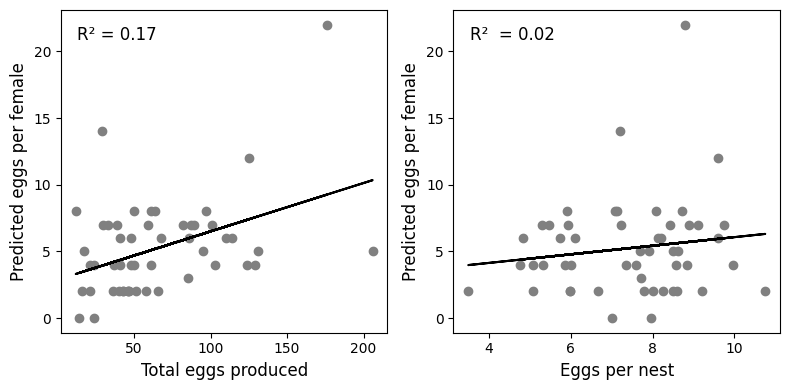

In [61]:
from sklearn.linear_model import LinearRegression


#fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, figsize=(10, 10))
fig, (ax1, ax4) = plt.subplots(1, 2, figsize=(8, 4))
#ax1, ax2 = axes[0]
#ax3, ax4 = axes[1]


font_size = 12

# Scatter plot of actual eggs vs predicted eggs
y = dt['predicted_eggs'].values.reshape(-1, 1)
X = dt['eggs_produced'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
r2 = round(reg.score(X, y), 2)
ax1.scatter(dt['eggs_produced'], dt['predicted_eggs'], color='gray')
ax1.plot(X, reg.predict(X), color='black')
ax1.set_xlabel('Total eggs produced', fontsize=font_size)
ax1.set_ylabel('Predicted eggs per female', fontsize=font_size)
ax1.text(0.05, 0.95, f'R² = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, fontsize=font_size)
#ax1.text(0.05, 0.95, f'R² = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, fontsize=font_size)


# Scatter plot of actual eggs vs cumulative predicted eggs
y = dt['predicted_eggs'].values.reshape(-1, 1)
X = dt['eggs_per_nest'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
r2 = round(reg.score(X, y), 2)
ax4.scatter(dt['eggs_per_nest'], dt['predicted_eggs'], color='gray')
ax4.plot(X, reg.predict(X), color='black')
ax4.set_xlabel('Eggs per nest', fontsize=font_size)
#ax4.set_ylabel('Cumulative degree days above 13.9 ℃', fontsize=font_size)
ax4.set_ylabel('Predicted eggs per female', fontsize=font_size)
ax4.text(0.05, 0.95, f'R²  = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax4.transAxes, fontsize=font_size)

# title for whole plot
#fig.suptitle('Relative Variation between predicted and observed eggs produced', fontsize=font_size+2)

plt.tight_layout()
plt.show()


In [71]:
# Scatter plot of actual eggs vs predicted eggs
y = dt['predicted_eggs'].values.reshape(-1, 1)
X = dt['eggs_produced'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
r2 = round(reg.score(X, y), 2)
r2

0.17

In [33]:
######## Senstivity Analysis ########

from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define the model
def getPredictedEggs(tmean, ppt, forage_quality, forage_threshold=0.5, temp_threshold=13.9, ppt_threshold=5.0, egg_below_threshold=1, egg_above_threshold=2):
    eggs = 0
    egg_delta = 1
    #eggs_degree_days = 0
    if forage_quality < forage_threshold:
        egg_delta = egg_below_threshold
    else:
        egg_delta = egg_above_threshold
    for day in range(len(tmean)):
        tm = tmean[day]
        pt = ppt[day]
        if tm >= temp_threshold and pt < ppt_threshold:
            eggs += egg_delta
            #eggs_degree_days += tm - temp_threshold
    return eggs # _degree_days * egg_delta

import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def evaluateModel(dt, forage_threshold, temp_threshold, ppt_threshold, egg_below_threshold=1, egg_above_threshold=2):
    dt['predicted_eggs'] = dt.apply(lambda x: getPredictedEggs(x['tmeans'], x['ppts'], x['forage_quality'], forage_threshold, temp_threshold, ppt_threshold), axis=1)

    # # make regression line
    # X = dt['predicted_eggs'].values.reshape(-1, 1)
    # #y = dt['eggs_per_nest'].values.reshape(-1, 1)
    # #y = dt['female_eggs_produced'].values.reshape(-1, 1)
    # y = dt['eggs_produced'].values.reshape(-1, 1)
    # reg = LinearRegression().fit(X, y)
    # reg.score(X, y)
    
    # # return r2
    # return r2_score(y, reg.predict(X))

    

    # Make sure 'site' and 'Time_Point' are categorical
    dt['Site_Code'] = dt['Site_Code'].astype('category')
    dt['Time_Point'] = dt['Time_Point'].astype('category')

    # Fit LMM: random intercept per site
    #model = smf.mixedlm("eggs_produced ~ predicted_eggs", dt, groups=dt["Site_Code"], re_formula="~Time_Point")
    model = smf.mixedlm("eggs_produced ~ predicted_eggs + Time_Point", dt, groups=dt["Site_Code"])
    result = model.fit()

    # View results
    #print(result.summary())


    # Predict values using the fitted model
    dt["fitted"] = result.fittedvalues


    # R²
    return r2_score(dt["eggs_produced"], dt["fitted"])



# Define problem definition
problem = {
    'num_vars': 3,
    'names': ['forage_threshold', 'temp_threshold', 'ppt_threshold'],
    'bounds': [[0.4, 0.6], [10, 22], [0, 10]]  # Ranges for input parameters
    
}

# problem = {
#     'num_vars': 2,
#     'names': [ 'temp_threshold', 'ppt_threshold'],
#     'bounds': [ [14, 18], [2, 6]]  # Ranges for input parameters
# }

# Generate Sobol samples
param_values = saltelli.sample(problem, 1000)

# Run model for each parameter set
Y = []
for params in param_values:
    forage_threshold, temp_threshold, ppt_threshold = params
    Y.append(evaluateModel(dt.copy(), forage_threshold, temp_threshold, ppt_threshold ))

# Perform Sobol sensitivity analysis
Si = sobol.analyze(problem, np.array(Y))

# Print results
print("First Order Sensitivity Indices:", Si['S1'])
print("Total Sensitivity Indices:", Si['ST'])
 

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_99953/1150655574.py:84: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/edwardamoah/Documents/GitHub/O

First Order Sensitivity Indices: [0.30332499 0.18115206 0.37646817]
Total Sensitivity Indices: [0.36795143 0.32769872 0.46428579]


/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


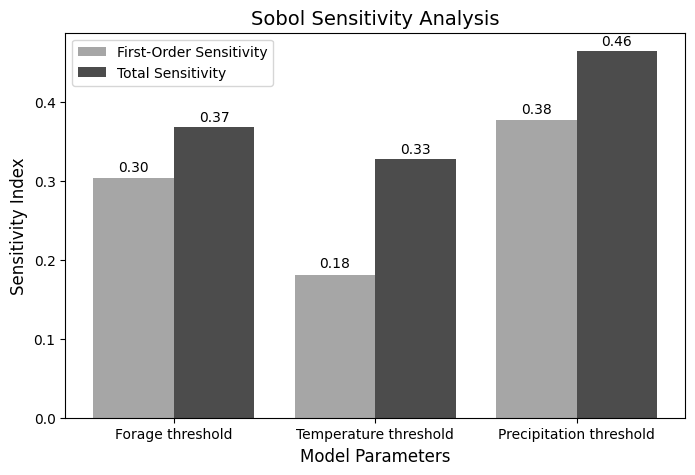

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Sensitivity indices from your results
param_names = ['Forage threshold', 'Temperature threshold', 'Precipitation threshold']
#param_names = [ 'Temperature Threshold', 'Precipitation Threshold']
S1 =  Si['S1'] #[0.50657284, 0.38937926, 0.03505102]  # First-order indices
ST =  Si['ST'] #[0.55911071, 0.44465644, 0.05203519]  # Total sensitivity indices

# Set up bar width and positions
x = np.arange(len(param_names))
width = 0.4  

# Create bar plots
fig, ax = plt.subplots(figsize=(8, 5))

# Plot first-order and total sensitivity indices
bars1 = ax.bar(x - width/2, S1, width, label="First-Order Sensitivity", color='gray', alpha=0.7)
bars2 = ax.bar(x + width/2, ST, width, label="Total Sensitivity", color='black', alpha=0.7)

# Add values on top of the bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', color='black')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 2), textcoords="offset points",
                ha='center', va='bottom', color='black')


# Labels and title
ax.set_ylabel("Sensitivity Index", fontsize=font_size)
ax.set_xlabel("Model Parameters", fontsize=font_size)
ax.set_title("Sobol Sensitivity Analysis", fontsize=font_size+2)
ax.set_xticks(x)
ax.set_xticklabels(param_names)
ax.legend()

#plt.show()


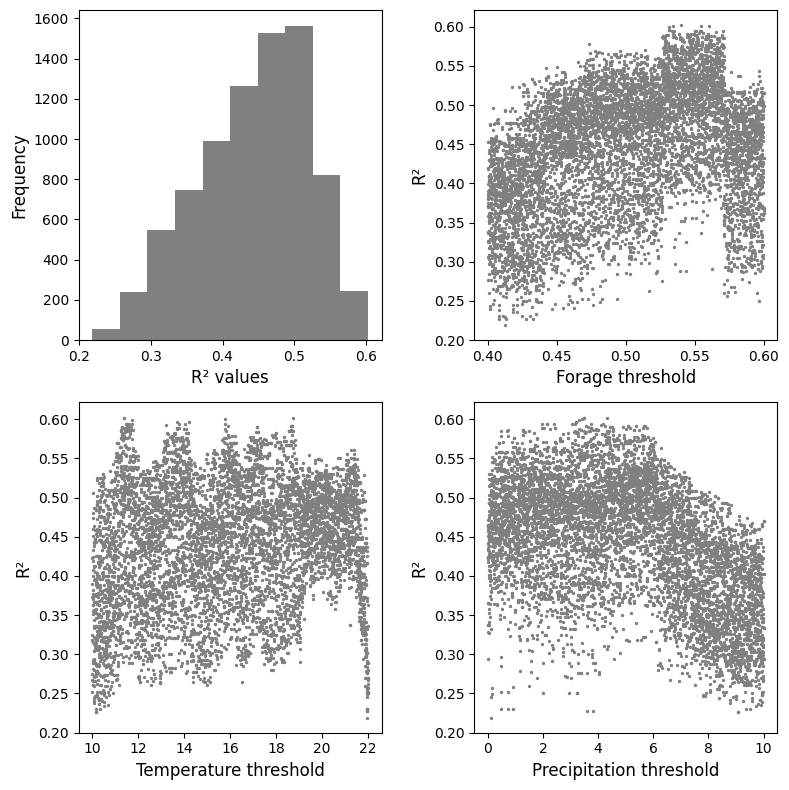

In [35]:
# FIGURE 3

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax1, ax2 = axes[0]
ax3, ax4 = axes[1]

#plt.hist(Y)
#plt.title('Distribution of R² values')
ax1.hist(Y, color='gray')
#ax1.set_title('Distribution of R² values')
ax1.set_xlabel('R² values', fontsize=font_size)
ax1.set_ylabel('Frequency', fontsize=font_size)


# B
ax2.scatter([float(item[0]) for item in param_values], Y, color='gray',s=2)
ax2.set_xlabel('Forage threshold', fontsize=font_size)
ax2.set_ylabel('R²', fontsize=font_size)

# C
ax3.scatter([float(item[1]) for item in param_values], Y, color='gray',s=2)
ax3.set_xlabel('Temperature threshold', fontsize=font_size)
ax3.set_ylabel('R²', fontsize=font_size)

# D
ax4.scatter([float(item[2]) for item in param_values], Y, color='gray',s=2)
ax4.set_xlabel('Precipitation threshold', fontsize=font_size)
ax4.set_ylabel('R²', fontsize=font_size)


plt.tight_layout()
plt.show()

#plt.ylabel('R²')
#plt.xlabel('Forage Threshold')

In [36]:
df1 = pd.DataFrame(param_values, columns=['Forage_Threshold', 'Temp_Threshold', 'Precip_Threshold'])
df1['R2'] = Y

In [37]:
column_with_high_r2 = df1['R2'].idxmax()
column_with_high_r2

5021

In [38]:
df1.iloc[column_with_high_r2]

Forage_Threshold     0.540137
Temp_Threshold      18.724609
Precip_Threshold     4.331055
R2                   0.602118
Name: 5021, dtype: float64

In [52]:
simulator.tmean.columns[5:]

Index(['sprng__', '20150501', '20150502', '20150503', '20150504', '20150505',
       '20150506', '20150507', '20150508', '20150509', '20150510', '20150511',
       '20150512', '20150513', '20150514', '20150515', '20150516', '20150517',
       '20150518', '20150519', '20150520', '20150521', '20150522', '20150523',
       '20150524', '20150525', '20150526', '20150527', '20150528', '20150529',
       '20150530', '20150531', '20150601', '20150602', '20150603', '20150604',
       '20150605', '20150606', '20150607', '20150608', '20150609', '20150610',
       '20150611', '20150612', '20150613', '20150614', '20150615', '20150616',
       '20150617', '20150618', '20150619', '20150620', '20150621', '20150622',
       '20150623', '20150624', '20150625', '20150626', '20150627', '20150628',
       '20150629', '20150630', 'grid_id'],
      dtype='object')

In [53]:
simulator.tmean.columns

Index(['col', 'row', 'lon', 'lat', 'Site', 'sprng__', '20150501', '20150502',
       '20150503', '20150504', '20150505', '20150506', '20150507', '20150508',
       '20150509', '20150510', '20150511', '20150512', '20150513', '20150514',
       '20150515', '20150516', '20150517', '20150518', '20150519', '20150520',
       '20150521', '20150522', '20150523', '20150524', '20150525', '20150526',
       '20150527', '20150528', '20150529', '20150530', '20150531', '20150601',
       '20150602', '20150603', '20150604', '20150605', '20150606', '20150607',
       '20150608', '20150609', '20150610', '20150611', '20150612', '20150613',
       '20150614', '20150615', '20150616', '20150617', '20150618', '20150619',
       '20150620', '20150621', '20150622', '20150623', '20150624', '20150625',
       '20150626', '20150627', '20150628', '20150629', '20150630', 'grid_id'],
      dtype='object')

In [55]:
simulator.ppt

,col,row,lon,lat,Site,sprng__,20150501,20150502,20150503,20150504,...,20150622,20150623,20150624,20150625,20150626,20150627,20150628,20150629,20150630,grid_id
0,1152,169,-77.000000,42.875000,AB,0.438429,0,0,0,0,...,0.011,4.013,0.744,0,0.938,0.000,43.619999,5.972,1.520,1152_169
1,1164,175,-76.500000,42.625000,BA,0.364626,0,0,0,0,...,1.689,0.486,2.931,0,0.447,0.000,40.249001,9.316,2.315,1164_175
2,1160,177,-76.666667,42.541667,BD,0.425636,0,0,0,0,...,3.859,0.981,0.852,0,0.052,0.000,40.520000,8.537,0.961,1160_177
3,1162,185,-76.583333,42.208333,EV,0.571365,0,0,0,0,...,2.777,2.963,5.533,0,0.000,0.019,41.455002,7.322,3.892,1162_185
4,1165,174,-76.458333,42.666667,GR,0.441039,0,0,0,0,...,1.545,0.379,2.562,0,0.815,0.000,43.162998,9.985,2.479,1165_174
5,1164,181,-76.500000,42.375000,HG,0.526532,0,0,0,0,...,8.788,1.613,5.274,0,0.000,0.000,38.556000,8.051,2.357,1164_181
6,1151,169,-77.041667,42.875000,HS,0.344499,0,0,0,0,...,0.000,4.110,0.782,0,0.487,0.000,45.956001,6.159,1.358,1151_169
7,1163,179,-76.541667,42.458333,IC,0.469469,0,0,0,0,...,4.940,1.404,1.424,0,0.000,0.000,41.620998,8.620,1.058,1163_179
8,1165,179,-76.458333,42.458333,IT,0.472890,0,0,0,0,...,5.783,0.668,2.560,0,0.000,0.000,31.518999,9.792,1.006,1165_179
9,1160,177,-76.666667,42.541667,KI,0.425636,0,0,0,0,...,3.859,0.981,0.852,0,0.052,0.000,40.520000,8.537,0.961,1160_177


In [39]:

dt['forage_quality'] = dt.apply(lambda x: simulator.getGridForageQuality(x['col'], x['row'], 2015), axis=1)

In [40]:
dt['eggs_rstd'] = dt.groupby('Site_Code')['eggs_produced'].std() / dt.groupby('Site_Code')['eggs_produced'].mean()

In [41]:
import statsmodels.api as sm

x = dt.groupby('Site_Code')['forage_quality'].mean().tolist() #dt['forage_quality']
y = (dt.groupby('Site_Code')['eggs_produced'].std() / dt.groupby('Site_Code')['eggs_produced'].mean()).tolist() #dt['eggs_rstd']

# Add a constant column to the x data
x = sm.add_constant(x)

# Create the linear regression model
model = sm.OLS(y, x)

# Fit the model to the data
results = model.fit()

# Get the predicted values of y based on the model
y_pred = results.predict(x)

In [42]:
results.summary()

/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                   0.09867
Date:                Fri, 27 Jun 2025   Prob (F-statistic):              0.758
Time:                        21:54:52   Log-Likelihood:                 6.5964
No. Observations:                  17   AIC:                            -9.193
Df Residuals:                      15   BIC:                            -7.526
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5231      0.261      2.002      0.064      -0.034       1.080
x1             0.1888      0.601      0.314      0.758      -1.092       1.470
==============================================================================
Omnibus:                        3.964   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.713
Skew:                           0.579   Prob(JB):                        0.425
Kurtosis:                       4.039   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
(dt.groupby('Site_Code')['eggs_produced'].std() / dt.groupby('Site_Code')['eggs_produced'].mean()).tolist()

[0.7279549200627514,
 0.5495217221678196,
 0.42012531346750814,
 0.8029212286503622,
 0.5917344040432597,
 0.7564565363786632,
 0.6122410209492325,
 0.4390031753183061,
 0.4769129394021813,
 0.28538267125706357,
 0.6393815614374556,
 1.032756047204283,
 0.6391953360304853,
 0.6034706363568395,
 0.48643289826534003,
 0.623344833770637,
 0.5814836325775734]

In [44]:
dt.groupby('Site_Code')['forage_quality'].mean().tolist()

[0.438429437280689,
 0.36462599696858405,
 0.425636027569988,
 0.571365438212645,
 0.441039411984689,
 0.526531628127725,
 0.34449943081655005,
 0.469469027955481,
 0.472890342717732,
 0.425636027569988,
 0.386848629750093,
 0.39909104448317406,
 0.479586746982598,
 0.326430941635855,
 0.465583696437963,
 0.284246744182938,
 0.469469027955481]

In [45]:
#dt[['tmean', 'ppt', 'forage_quality', 'eggs_produced']]
features = dt[['tmean', 'ppt', 'forage_quality']]
target = dt['eggs_produced']

In [46]:
### LLM ####

dt.columns.tolist()

['Site_Code',
 'col',
 'row',
 'forage_quality',
 'egg_days',
 'foraging_dates',
 'Proportion_Larval_Mortality',
 'Proportion_Female_Offspring',
 'Total_Emerged_Males',
 'Total_Emerged_Females',
 'Nest_Tubes for_Offspring_Analysis',
 'Nest_Tubes_for_Pollen_Analysis',
 'Total_Pollen_Provisions_Analyzed',
 'Temp_C',
 'Time_Point',
 'eggs_produced',
 'eggs_per_nest',
 'female_eggs_per_nest',
 'tmeans',
 'ppts',
 'tmean',
 'ppt',
 'predicted_eggs',
 'predicted_eggs_opt',
 'eggs_rstd']

In [47]:
dt1 = dt[['Site_Code', 'eggs_produced', 'predicted_eggs', 'Time_Point']]
dt2 = dt[['Site_Code', 'eggs_produced', 'predicted_eggs_opt', 'Time_Point']]

In [48]:
dt1 = dt[['Site_Code', 'eggs_produced', 'predicted_eggs', 'Time_Point']].rename(
    columns={
        'Site_Code': 'site',
        'eggs_produced': 'observed',
        'predicted_eggs': 'predicted'
    }
)


dt2 = dt[['Site_Code', 'eggs_produced', 'predicted_eggs_opt', 'Time_Point']].rename(
    columns={
        'Site_Code': 'site',
        'eggs_produced': 'observed',
        'predicted_eggs_opt': 'predicted'
    }
)

In [49]:
dt1['observed'].apply(lambda x: np.log(x))

0     3.493313
1     4.819754
2     3.828641
3     4.155156
4     4.858313
5     3.824641
6     4.574023
7     3.871201
8     3.931231
9     5.170034
10    4.453597
11    3.171453
12    2.468100
13    3.908332
14    3.580591
15    3.360375
16    4.827614
17    3.871201
18    4.406534
19    3.174424
20    3.703846
21    4.487537
22    4.735596
23    3.761200
24    4.464213
25    4.874528
26    3.846341
27    4.110874
28    4.187039
29    3.605025
30    3.390726
31    4.553028
32    3.687917
33    4.613705
34    3.056793
35    2.772589
36    4.076898
37    4.441979
38    2.833213
39    4.698205
40    5.327679
41    4.058046
42    3.713572
43    4.108138
44    3.044522
45    3.911308
46    2.639057
47    4.214867
48    3.662279
49    3.761200
50    4.634249
Name: observed, dtype: float64

In [50]:
import statsmodels.formula.api as smf

# Make sure 'site' and 'Time_Point' are categorical
dt1['site'] = dt1['site'].astype('category')
dt1['Time_Point'] = dt1['Time_Point'].astype('category')

# Fit LMM: random intercept per site
#model = smf.mixedlm("observed ~ predicted", dt1, groups=dt1["site"], re_formula="~Time_Point")
model = smf.mixedlm("observed ~ predicted + Time_Point", dt1, groups=dt1["site"])
result = model.fit()

# View results
print(result.summary())


           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  observed 
No. Observations:   51       Method:              REML     
No. Groups:         17       Scale:               1019.3903
Min. group size:    3        Log-Likelihood:      -240.4446
Max. group size:    3        Converged:           Yes      
Mean group size:    3.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z   P>|z|  [0.025 0.975]
-----------------------------------------------------------
Intercept         8.742   17.990 0.486 0.627 -26.517 44.000
Time_Point[T.2]  45.152   13.519 3.340 0.001  18.655 71.650
Time_Point[T.3]  13.769   14.992 0.918 0.358 -15.615 43.154
predicted         7.010    1.872 3.745 0.000   3.341 10.678
Group Var       209.022    7.818                           



In [51]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict values using the fitted model
dt1["fitted"] = result.fittedvalues

# R²
r2 = r2_score(dt1["observed"], dt1["fitted"])

# RMSE
rmse = np.sqrt(mean_squared_error(dt1["observed"], dt1["fitted"]))

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R²: 0.521
RMSE: 28.642


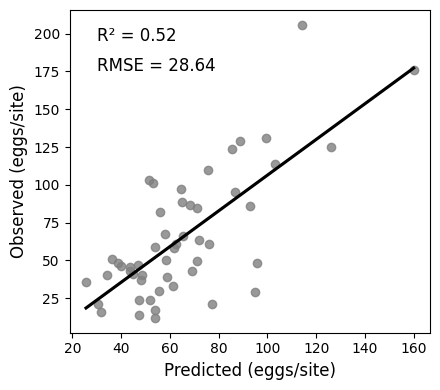

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4.5, 4))
sns.regplot(x="fitted", y="observed", data=dt1, ci=None, color='gray', line_kws={"color": "black"})

plt.ylabel("Observed (eggs/site)", fontsize=12)
plt.xlabel("Predicted (eggs/site)", fontsize=12)
#plt.title(f"Observed vs. Predicted\nR² = {r2:.2f}, RMSE = {rmse:.2f}")

# put R2 AND rmse on plot
plt.text(30, 195, f"R² = {r2:.2f}", fontsize=12)
plt.text(30, 175, f"RMSE = {rmse:.2f}", fontsize=12)

#plt.grid(True)
plt.tight_layout()
plt.show()


In [72]:
# Scatter plot of actual eggs vs predicted eggs
y = dt['predicted_eggs'].values.reshape(-1, 1)
X = dt['eggs_produced'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
r2 = round(reg.score(X, y), 2)
r2

0.17

In [74]:
# Scatter plot of actual eggs vs predicted eggs
y = dt['predicted_eggs'].values.reshape(-1, 1)
X = dt['eggs_produced'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)

# R²
r2 = r2_score(dt["eggs_produced"], dt["predicted_eggs"])

r2


-2.026804968124406

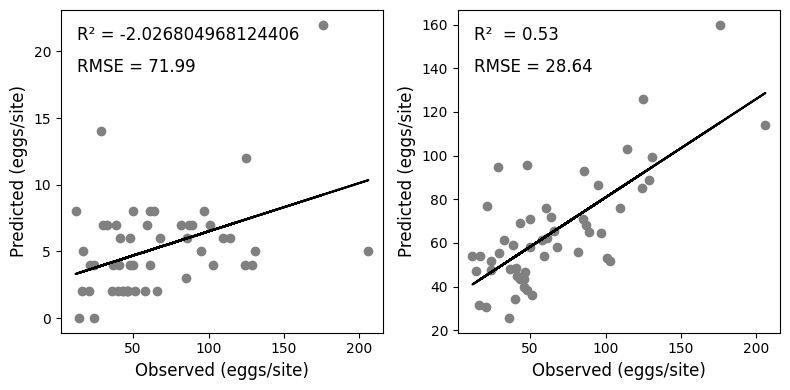

In [69]:
from sklearn.linear_model import LinearRegression


#fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, figsize=(10, 10))
fig, (ax1, ax4) = plt.subplots(1, 2, figsize=(8, 4))
#ax1, ax2 = axes[0]
#ax3, ax4 = axes[1]


font_size = 12

# Scatter plot of actual eggs vs predicted eggs
y = dt['predicted_eggs'].values.reshape(-1, 1)
X = dt['eggs_produced'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)

# R²
r2 = r2_score(dt["eggs_produced"], dt["predicted_eggs"])

# RMSE
rmse = np.sqrt(mean_squared_error(X, y))

ax1.scatter(dt['eggs_produced'], dt['predicted_eggs'], color='gray')
ax1.plot(X, reg.predict(X), color='black')
ax1.set_xlabel('Observed (eggs/site)', fontsize=font_size)
ax1.set_ylabel('Predicted (eggs/site)', fontsize=font_size)
ax1.text(0.05, 0.95, f'R² = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, fontsize=font_size)
#ax1.text(0.05, 0.95, f'R² = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, fontsize=font_size)
ax1.text(0.05, 0.85, f'RMSE = {rmse:.2f}', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, fontsize=font_size)


# Scatter plot of actual eggs vs cumulative predicted eggs
#y = dt['predicted_eggs'].values.reshape(-1, 1)
#X = dt['eggs_per_nest'].values.reshape(-1, 1)

#sns.regplot(x="fitted", y="observed", data=dt1, ci=None, color='gray', line_kws={"color": "black"})
y = dt1['fitted'].values.reshape(-1, 1)
X = dt1['observed'].values.reshape(-1, 1)

# R²
r2 = r2_score(dt1["observed"], dt1["fitted"])

# RMSE
rmse = np.sqrt(mean_squared_error(dt1["observed"], dt1["fitted"]))


reg = LinearRegression().fit(X, y)
r2 = round(reg.score(X, y), 2)
ax4.scatter(dt1['observed'], dt1['fitted'], color='gray')
ax4.plot(X, reg.predict(X), color='black')
# ax4.set_title('Hybrid Model', fontsize=font_size)
ax4.set_xlabel('Observed (eggs/site)', fontsize=font_size)
ax4.set_ylabel('Predicted (eggs/site)', fontsize=font_size)
ax4.text(0.05, 0.95, f'R²  = {r2}', horizontalalignment='left', verticalalignment='top', transform=ax4.transAxes, fontsize=font_size)
ax4.text(0.05, 0.85, f'RMSE = {rmse:.2f}', horizontalalignment='left', verticalalignment='top', transform=ax4.transAxes, fontsize=font_size)

# title for whole plot
#fig.suptitle('Relative Variation between predicted and observed eggs produced', fontsize=font_size+2)

plt.tight_layout()
plt.show()


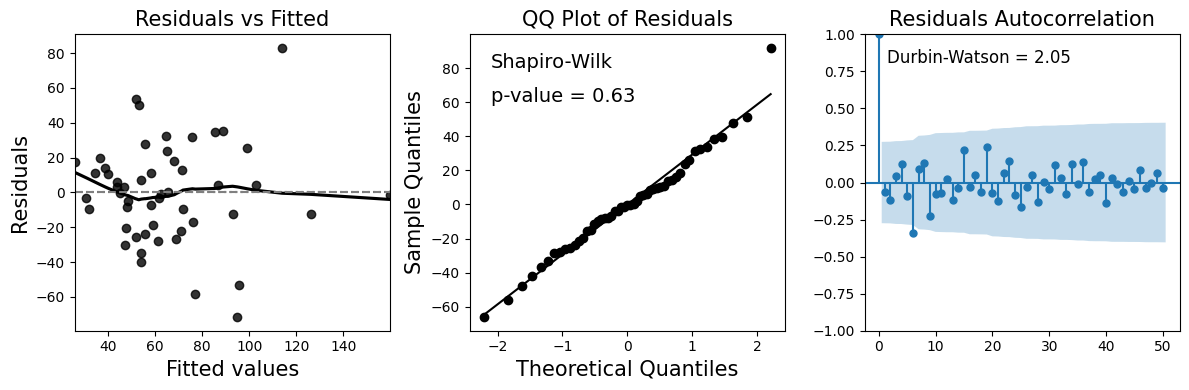

In [77]:
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats

residuals = result.resid

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.residplot(x=result.fittedvalues, y=dt1['observed'], lowess=True, color='black')
plt.xlabel("Fitted values", fontsize=15)
plt.ylabel("Residuals", fontsize=15)
plt.title("Residuals vs Fitted", fontsize=15)
plt.axhline(0, color='gray', linestyle='--')
#plt.ylim(-90, 150)

plt.subplot(1, 3, 2)
# Create a QQ plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.gca().get_lines()[0].set_color('black') 
plt.gca().get_lines()[1].set_color('black') 
plt.xlabel("Theoretical Quantiles", fontsize=15)
plt.ylabel("Sample Quantiles", fontsize=15)
plt.title("QQ Plot of Residuals", fontsize=15)
p_value = stats.shapiro(residuals)[1]  # Shapiro-Wilk test for normality
plt.text(-2.1,80, f"Shapiro-Wilk", fontsize=14)
plt.text(-2.1,60, f"p-value = {p_value:.2f}", fontsize=14)

ax = plt.subplot(1, 3, 3)
plot_acf(result.resid, lags=50, ax=ax)
# Additional plot
# Add your code for the third plot here
plt.title("Residuals Autocorrelation", fontsize=15)
durbin_watson = sm.stats.durbin_watson(result.resid)
plt.text(0.07, 0.95, f'Durbin-Watson = {durbin_watson:.2f}', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=12)

plt.tight_layout()

plt.show()

In [78]:
stats.shapiro(residuals)

ShapiroResult(statistic=np.float64(0.9820628194231993), pvalue=np.float64(0.6292524358538656))

In [247]:
import statsmodels.formula.api as smf

# Make sure 'site' and 'Time_Point' are categorical
dt2['site'] = dt2['site'].astype('category')
dt2['Time_Point'] = dt2['Time_Point'].astype('category')

# Fit LMM: random intercept per site
#model = smf.mixedlm("observed ~ predicted", dt1, groups=dt1["site"], re_formula="~Time_Point")
model = smf.mixedlm("observed ~ predicted + Time_Point", dt2, groups=dt2["site"])
result = model.fit()

# View results
print(result.summary())


           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  observed 
No. Observations:   51       Method:              REML     
No. Groups:         17       Scale:               853.9935 
Min. group size:    3        Log-Likelihood:      -236.0172
Max. group size:    3        Converged:           Yes      
Mean group size:    3.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z   P>|z|  [0.025 0.975]
-----------------------------------------------------------
Intercept         2.467   14.856 0.166 0.868 -26.650 31.584
Time_Point[T.2]  44.642   11.487 3.886 0.000  22.127 67.157
Time_Point[T.3]  19.190   13.089 1.466 0.143  -6.464 44.844
predicted        13.779    2.650 5.200 0.000   8.585 18.973
Group Var       187.782    7.021                           



In [80]:
dt2.describe()

,observed,predicted,Time_Point
count,51.000000,51.000000,51.000000
mean,65.080662,3.000000,2.000000
std,41.791679,2.097618,0.824621
min,11.800000,0.000000,1.000000
25%,37.866304,1.000000,1.000000
50%,49.964286,3.000000,2.000000
75%,87.877403,4.000000,3.000000
max,205.959302,12.000000,3.000000


In [248]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict values using the fitted model
dt2["fitted"] = result.fittedvalues

# R²
r2 = r2_score(dt2["observed"], dt2["fitted"])

# RMSE
rmse = np.sqrt(mean_squared_error(dt2["observed"], dt2["fitted"]))

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R²: 0.602
RMSE: 26.102


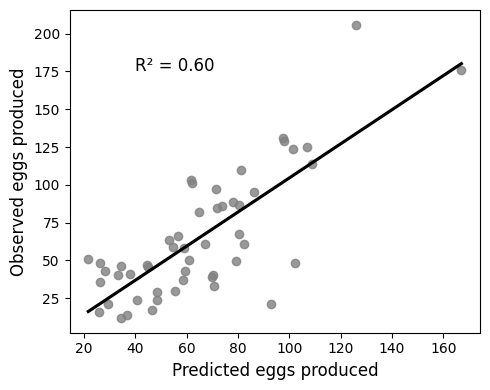

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.regplot(x="fitted", y="observed", data=dt2, ci=None, color='gray', line_kws={"color": "black"})

plt.xlabel("Predicted eggs produced", fontsize=12)
plt.ylabel("Observed eggs produced", fontsize=12)
#plt.title(f"Observed vs. Predicted\nR² = {r2:.2f}, RMSE = {rmse:.2f}")

# put R2 AND rmse on plot
plt.text(40, 175, f"R² = {r2:.2f}", fontsize=12)

#plt.grid(True)
plt.tight_layout()
plt.show()
